# Homework
Valeria Sanchez

## Wladimir Banda-Barragán

Please complete the following problems. You can work with your **TEAM** members.

When you finish, you can call your notebook with the TEAM's name, e.g. TEAM_name.ipynb, and also include your names in the notebook. Then, you can create a pull request to the subfolder **homework** in Session 3.

Note that data for the exercises are not given on purpose. Use online material to **INVESTIGATE** what data you need to solve the problems.

Within a **SINGLE python notebook**, add the following:

### Problem 1.
Calculate:


 - The pressure of the plasma permeating the Solar corona. How does it compare to Earth's atmospheric pressure at the sea level? The number density of the Solar corona is $n=10^9\,\rm cm^{-3}$ and its temperature is $T=2\times 10^6\,\rm K$.
 
 
 - The polytropic index of carbon-monoxide (CO) gas. Hint: Get the degrees of freedom first.


 - The mean particle mass (mean molecular weight) of air in our atmosphere (remember Nytrogen is the most abundant element). Once calculated, add it to the phase diagram $T$ vs. $\mu$ shown in class. How does the value compare to that of atomic hydrogen?


 - The Reynolds number of the blood flow in the aorta. Hint: Use the Internet to get the parameters you need.




--------------------------------------------------------------------------------------------------------------------
In order to calculate n of our atmosphere, first we calculate $\mu$:
$$\frac{1}{\mu}=\sum_i{\frac{x_i}{A_i}}\left(1+Z_i\right),$$

In the case of our atmosphere, made of nitrogen and oxygen mainly:

$$\frac{1}{\mu}=0.5638$$
$$\mu=1.7736$$

The density of the atmosphere at sea level is: 0.001225 $g/cm^3$.
$$ n=4.13 \times 10^{20}$$

The typical temperature at sea level is 288.15 K


In [4]:
# Import some libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the EOS equation
def pressure(x, y):
    return (x*1.38e-16*y)

In [5]:
print('Plasma in the Solar corona:', "{:0.5e}".format(pressure(10**(9),2.0*10**6.0)))
print('Atmosphere at sea level:', "{:0.5e}".format(pressure(4.13*10**20,288.15)))

Plasma in the Solar corona: 2.76000e-01
Atmosphere at sea level: 1.64228e+07


(1000, 3200)
[1.38000000e-26 1.41214433e-26 1.44503740e-26 ... 1.25857496e+16
 1.28789094e+16 1.31788977e+16]


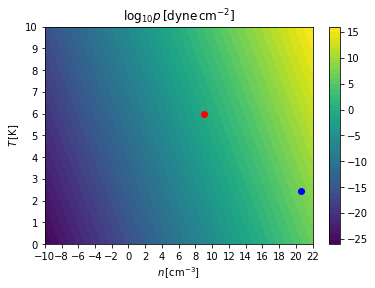

In [6]:
# Plot pressure again, including the two points above.
n1 = 9   #ya saque el log
T1 = 6

n2 = 20.61
T2 = 2.45

# Create a 2D grid with n and T as X and Y. rango en escala logaritmica
number_density = np.arange(-10,22,0.01)
temperature = np.arange(0,10,0.01)

X, Y = np.meshgrid(number_density, temperature) # crear mallado

# Compute pressure on the grid
pressure_1D = np.array(pressure(np.ravel(10**X), np.ravel(10**Y)))
Z = pressure_1D.reshape(X.shape) #como exponentes de 10
#reshape: ajusta a malla
print(Z.shape)
print(pressure_1D)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(-26, 16, 43), cmap='viridis')
#aqui anadimos los puntos
ax.scatter(n1, T1, c='red') 
ax.scatter(n2, T2, c='blue')
    
# Add a colorbar and customise axes
fig.colorbar(cp) 
ax.set_title(r'$\log_{10} p\,\rm [dyne\,cm^{-2}$]')
ax.set_xticks(np.arange(-10,23,2))
ax.set_xlabel(r'$n\,\rm [cm^{-3}]$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$T\,\rm [K]$')
plt.show()

--------------------------------------------------------------------------------------------------------------------
The CO has 7 degrees of freedom: 3 traslational, 2 rotational and 2 vibrational. Thus:
$$\gamma = \frac{9}{7} $$


--------------------------------------------------------------------------------------------------------------------
As we calculated on the previous point:
$$\mu_{atm}=1.7736$$
For nitrogen we have:
$$\mu_N=1.75$$
Now for the same temperature we have:

<ipython-input-10-49e4e74a4dc3>:6: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt((gamma*k_B*temp)/(mu*amu))


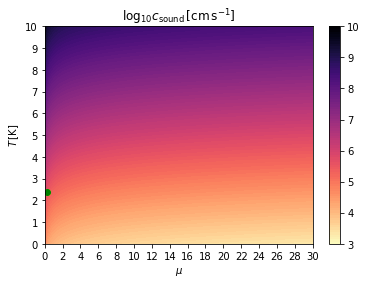

In [10]:
# Define the EOS equation
def sound_speed(mu, temp):
    gamma = 5./3. #For nitrogen too ie. atmosphere
    k_B = 1.38e-16
    amu = 1.660e-24 
    return np.sqrt((gamma*k_B*temp)/(mu*amu))

# Create a 2D grid with n and T as X and Y.
mu = np.arange(0,30,0.01) 
temperature = np.arange(0,10,0.01)

X, Y = np.meshgrid(mu, temperature)

# Compute pressure on the grid
sound_speed_1D = np.array(sound_speed(np.ravel(X), np.ravel(10**Y)))
Z = sound_speed_1D.reshape(X.shape) #vel sonido en malla

# Plot phase plot, including the two points above.
mu1 = 0.2488
T1 = 2.4

mu2 = 0.243
T2 = 2.4

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(3, 10, 91), cmap='magma_r')
ax.scatter(mu1, T1, c='yellow')
ax.scatter(mu2, T2, c='green')
    
# Add a colorbar and customise axes
fig.colorbar(cp, ticks = np.arange(3,11,1))
ax.set_title(r'$\log_{10} c_{\rm sound}\,\rm [cm\,s^{-1}$]')
ax.set_xticks(np.arange(0,31.0,2.0))
ax.set_xlabel(r'$\mu$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$T\,\rm [K]$')
plt.show()

Practically the same point!

--------------------------------------------------------------------------------------------------------------------

### Problem 2.
Considering the example of the swimming fish we saw in class, calculate the Reynolds numbers for different swimming speeds and make a plot of $R_{\rm e}$ vs. speed. Indicate the laminar and turbulent regimes on the plot. At which speed does the fish start generating a turbulent flow in sea water?



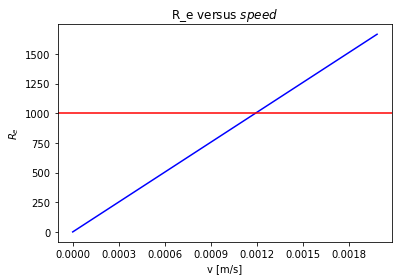

In [44]:
# Define Re function

def Re_number(rho, vel, length, mu):
    return (rho*vel*length)/(mu)

# All quantities in SI units.

mu=0.00122
le=1
rho=1026

vel = np.arange(0,0.002,0.00011)
#len(vel)
R= Re_number(rho,vel,le,mu)
#plotting
fig,ax=plt.subplots(1,1)
ax.plot(vel, R, c='blue') #Kolmogorov
plt.axhline(y=1000, color='r', linestyle='-')
plt.xticks(np.arange(0, 0.0021, step=0.0003))
ax.set_title(r'R_e versus $speed$')
ax.set_xlabel(r'v [m/s]')
ax.set_ylabel(r'$R_e$')
plt.show()
#R

Thus, a transition from laminar to turbulent regime occurs for a speed around 0.0012 m/s. Practically the fish always generates turbulence. As we in increase de speed, the Reynold number increase their magnitude.

### Problem 3.
Download the full dataset from the 2D turbulence simulation that we analysed in class (TURB_DRIVE) and:

 - Calculate the rms flow velocity and the corresponding rms Mach number as a function of time (see equations in the lecture notebook).
 
 
 - Save the data into a text file as shown in the example in class, and then make a plot of rms Mach number versus time. Remember that the sound speed of the simulation is $c_{\rm iso}=10\,\rm km\,s^{-1}$.
 
 
 - Based on the result above, is the gas subsonic or supersonic in this simulation?
 
 
 - Calculate the gas pressure using the isothermal equation of state ($p=\rho\,c_{\rm iso}^2$), and make and print a 2D map of the pressure for file #70.
 
 
 - Now that you have the pressure, you can calculate the so-called plasma beta of the gas, which is a dimensionless parameter that relates thermal, $p$, and magnetic pressure $\left(\frac{B^2}{8\,\pi}\right)$. Compute the plasma beta and make and print a 2D map for file #70.
 
 $$\beta = \frac{8\,\pi\,p}{B^2}$$
 

Full Data: https://www.dropbox.com/sh/gt3grmb24no04lp/AAAxAZGErA1E1cpZ0xENF1Xma?dl=0